## Understanding the data

In [1]:
from scipy.io import loadmat

mat = loadmat('data/DataSet1.mat')
data = mat['data']


In [4]:
data.size

1

In [5]:
data.shape

(1, 1)

In [6]:
# spikes
spikes = data['spikes'][0][0]   # a cell array of spike-time vectors

# number of neurons
n_neurons = int(data['nNeurons'][0][0][0][0])

# physical coordinates
x_coords = data['x'][0][0].flatten()
y_coords = data['y'][0][0].flatten()

# recording length
recording_length = data['recordinglength'][0][0][0][0]


In [8]:
spikes.size

166

In [14]:
spikes[0][0].size

19330

In [19]:
spikes[0][0][0][0:10]  # first 10 spike times of neuron 1

array([ 8230.1 , 10040.6 , 10261.95, 10383.4 , 10514.1 , 10562.4 ,
       10792.5 , 10883.9 , 10983.5 , 11084.25])

## Processing

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


In [4]:
def load_dataset(path):
    mat = sio.loadmat(path)
    data = mat['data']
    
    spikes = data['spikes'][0][0]
    n_neurons = int(data['nNeurons'][0][0][0][0])
    x = data['x'][0][0].flatten()
    y = data['y'][0][0].flatten()
    recording_length = float(data['recordinglength'][0][0][0][0])
    return spikes, n_neurons, x, y, recording_length



In [5]:
all_datasets = []

for i in range(1, 26):
    f = f"data/DataSet{i}.mat"
    spikes, n_neurons, x, y, recording_length = load_dataset(f)
    all_datasets.append({
        "spikes": spikes,
        "n": n_neurons,
        "x": x,
        "y": y,
        "T": recording_length
    })

In [25]:
all_datasets[24]

{'spikes': array([[array([[2.67015000e+03, 2.70450000e+03, 2.76020000e+03, ...,
                 3.55798165e+06, 3.58317160e+06, 3.59249280e+06]])   ],
        [array([[2.69725000e+03, 3.64413500e+04, 3.69412000e+04, 3.72155500e+04,
                 8.57235000e+04, 8.73805000e+04, 9.59333000e+04, 9.72288500e+04,
                 1.17175800e+05, 1.79016050e+05, 1.79087850e+05, 2.31513150e+05,
                 2.58553300e+05, 2.73210900e+05, 2.74285050e+05, 2.99160250e+05,
                 2.99588600e+05, 2.99891300e+05, 3.00158700e+05, 3.13732900e+05,
                 3.20728100e+05, 3.40684150e+05, 3.69158950e+05, 3.71203250e+05,
                 3.71510850e+05, 3.73621000e+05, 3.81599100e+05, 3.88682650e+05,
                 3.88775750e+05, 4.17246150e+05, 4.33142950e+05, 4.33838250e+05,
                 4.33979450e+05, 4.34193800e+05, 4.35119300e+05, 4.54373150e+05,
                 4.55028100e+05, 4.55309950e+05, 4.62784500e+05, 4.89702300e+05,
                 5.46878800e+05, 5.470

## Rate Coding

Rate coding assumes that neurons encode information in their firing rate — the number of spikes per unit time.
For each neuron, the firing rate is computed by counting spikes within a time window.
When we take the mean across neurons, we get the population firing rate (of all neurons in a dataset)


In [6]:
def compute_firing_rates(neurons, T_ms):
    rates= []
    T_sec= T_ms/1000 #convert to sec
    for spikes in neurons:
        rates.append(len(spikes[0]) / T_sec)
    return np.array(rates)


In [8]:
for i, x in enumerate(all_datasets):
    x['firing_rates'] = compute_firing_rates(x['spikes'], x['T'])
    print(f"Mean firing rate for all neurons for dataset {i}:", np.mean(x['firing_rates']))

Mean firing rate for all neurons for dataset 0: 0.0002777777777777777
Mean firing rate for all neurons for dataset 1: 0.0002777777777777778
Mean firing rate for all neurons for dataset 2: 0.0002777777777777777
Mean firing rate for all neurons for dataset 3: 0.0002777777777777778
Mean firing rate for all neurons for dataset 4: 0.0002777777777777778
Mean firing rate for all neurons for dataset 5: 0.0002777777777777777
Mean firing rate for all neurons for dataset 6: 0.0002777777777777778
Mean firing rate for all neurons for dataset 7: 0.0002777777777777777
Mean firing rate for all neurons for dataset 8: 0.0002777777777777778
Mean firing rate for all neurons for dataset 9: 0.0002777777777777778
Mean firing rate for all neurons for dataset 10: 0.0002777777777777778
Mean firing rate for all neurons for dataset 11: 0.0002777777777777778
Mean firing rate for all neurons for dataset 12: 0.0002777777777777778
Mean firing rate for all neurons for dataset 13: 0.0002777777777777778
Mean firing rate

## Plots

In [9]:
ds = all_datasets[0]   # dataset 1
spikes = ds["spikes"]
rates = ds["firing_rates"]
x = ds["x"]
y = ds["y"]
T = ds["T"]


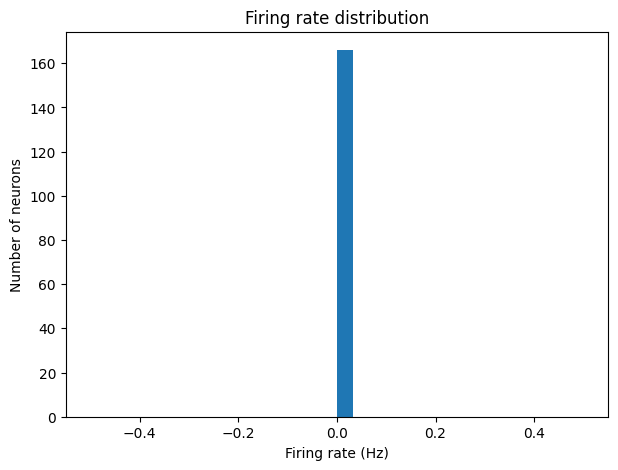

In [10]:
plt.figure(figsize=(7,5))
plt.hist(rates, bins=30)
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Number of neurons")
plt.title("Firing rate distribution")
plt.show()


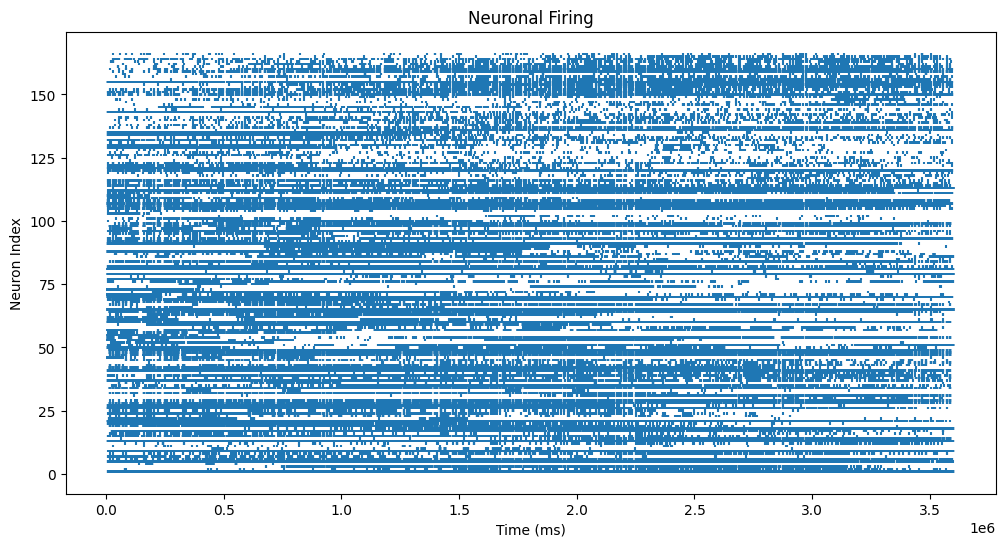

In [13]:
def plot_raster(spikes):
    plt.figure(figsize=(12,6))
    for neuron_idx, sp in enumerate(spikes):
        spike_times = sp[0]
        plt.vlines(spike_times, neuron_idx + 0.5, neuron_idx + 1.5)
    plt.xlabel("Time (ms)")
    plt.ylabel("Neuron Index")
    plt.title("Neuronal Firing")
    plt.show()

plot_raster(spikes)
